In [25]:
import pandas as pd
import numpy as np

# Load the data from CSV
data = pd.read_csv('sensor_data.csv')

# Preview the data
data.head()

,Participant,Timestamp,X,Y,Z,Label
0,Participant 1,12000,8.42,1.46,-5.19,Wrong
1,NaN,14202,10.99,-4.27,-4.70,Correct
2,NaN,15000,-10.68,4.09,27.28,Wrong
3,NaN,16202,-15.20,-2.14,37.05,Correct
4,NaN,17000,-3.60,5.43,28.63,Wrong


In [26]:
# Drop participant and timestamp columns
# data = data.drop(columns=['Participant', 'Timestamp'])

# Map 'correct' and 'wrong' labels to 1 and 0
data['Label'] = data['Label'].map({'Correct': 1, 'Wrong': 0})

# Normalise the gyroscope data (X, Y, Z) by subtracting the mean and dividing by the standard deviation
data[['X', 'Y', 'Z']] = (data[['X', 'Y', 'Z']] - data[['X', 'Y', 'Z']].mean()) / data[['X', 'Y', 'Z']].std()

# Calculate the magnitude of the gyroscope data (X, Y, Z)
data['magnitude'] = np.sqrt(data['X']**2 + data['Y']**2 + data['Z']**2)

# Update the feature set to include the magnitude
features = data[['X', 'Y', 'Z', 'magnitude']]

# Separate the features and labels
X = features
y = data['Label']

# Check the processed data
X.head(), y.head()


(          X         Y         Z  magnitude
 0  0.256480  0.089555 -0.260049   0.376068
 1  0.339432 -0.234918 -0.242350   0.478679
 2 -0.360014  0.238484  0.912803   1.009799
 3 -0.505907 -0.114303  1.265707   1.367852
 4 -0.131492  0.314365  0.961567   1.020160,
 0    0
 1    1
 2    0
 3    1
 4    0
 Name: Label, dtype: int64)

In [4]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the split data sizes
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((780, 3), (196, 3), (780,), (196,))

In [39]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model
model = Sequential([
    Dense(48, activation='relu', input_shape=(X_train.shape[1],)),  # 64 neurons in the hidden layer
    Dense(32, activation='relu'),                                  # Another hidden layer
    Dense(1, activation='sigmoid')                                  # Sigmoid for binary classification (correct or wrong)
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summarize the model architecture
model.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 48)                192       
                                                                 
 dense_29 (Dense)            (None, 32)                1568      
                                                                 
 dense_30 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1,793
Trainable params: 1,793
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
25/25 [==============================] - 1s 8ms/step - loss: 0.6924 - accuracy: 0.4692 - val_loss: 0.6773 - val_accuracy: 0.4949
Epoch 2/10
25/25 [==============================] - 0s 3ms/step - loss: 0.6820 - accuracy: 0.5218 - val_loss: 0.6723 - val_accuracy: 0.4796
Epoch 3/10
25/25 [==============================] - 0s 2ms/step - loss: 0.6763 - accuracy: 0.5333 - val_loss: 0.6706 - val_accuracy: 0.5204
Epoch 4/10
25/25 [==============================] - 0s 2ms/step - loss: 0.6732 - accuracy: 0.5449 - val_loss: 0.6712 - val_accuracy: 0.5153
Epoch 5/10
25/25 [==============================] - 0s 2ms/step - loss: 0.6707 - accuracy: 0.5615 - val_loss: 0.6708 - val_accuracy: 0.5204
Epoch 6/10
25/25 [==============================] - 0s 2ms/step - loss: 0.6689 - accuracy: 0.5526 - val_loss: 0.6703 - val_accuracy: 0.5153
Epoch 7/10
25/25 [==============================] - 0s 2ms/step - loss: 0.6672 - accuracy: 0.5577 - val_loss: 0.6705 - val_accuracy: 0.5204
Epoch 8/10
25/25 [==

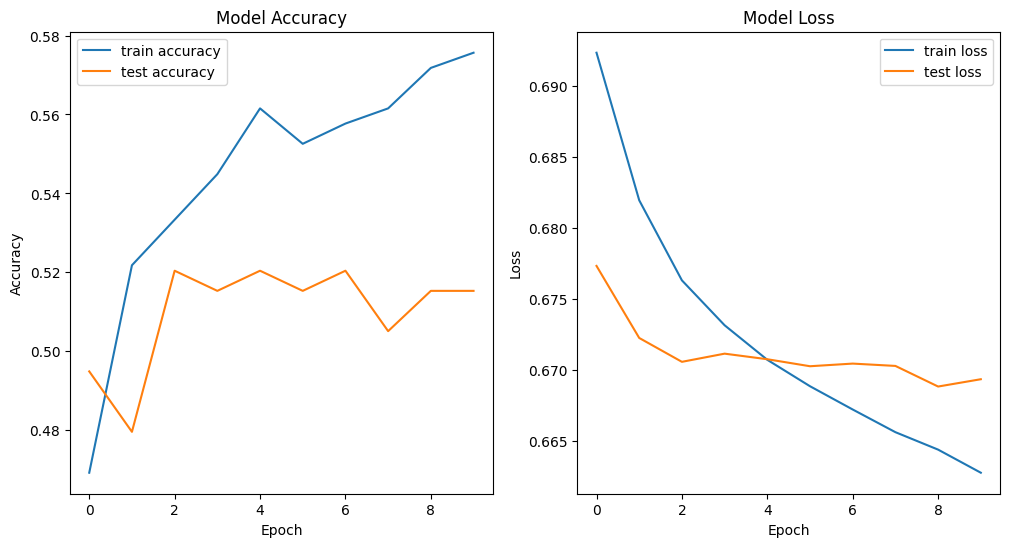

In [40]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Plot training history
import matplotlib.pyplot as plt

# Plot accuracy and loss curves
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='test accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='test loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [41]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test)

print(f"Test Accuracy: {test_acc*100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

7/7 [==============================] - 0s 981us/step - loss: 0.6694 - accuracy: 0.5153
Test Accuracy: 51.53%
Test Loss: 0.6694
